In [1]:
# house price prediction
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("house price prediction.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics 
%matplotlib inline

In [4]:
data.shape

(4600, 18)

In [5]:
data.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [7]:
print(data.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [8]:
data.rename(columns = {'bedrooms': 'noOfBedrooms'}, inplace = True)


In [9]:
X = data[['floors','noOfBedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition',
          'sqft_above','sqft_basement','yr_built','yr_renovated']]
Y = data[['price']]/100000


In [10]:
print(X)

      floors  noOfBedrooms  bathrooms  sqft_living  sqft_lot  waterfront  \
0        1.5             3       1.50         1340      7912           0   
1        2.0             5       2.50         3650      9050           0   
2        1.0             3       2.00         1930     11947           0   
3        1.0             3       2.25         2000      8030           0   
4        1.0             4       2.50         1940     10500           0   
...      ...           ...        ...          ...       ...         ...   
4595     1.0             3       1.75         1510      6360           0   
4596     2.0             3       2.50         1460      7573           0   
4597     2.0             3       2.50         3010      7014           0   
4598     1.0             4       2.00         2090      6630           0   
4599     2.0             3       2.50         1490      8102           0   

      view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0        0  

In [11]:
print(Y)

          price
0      3.130000
1     23.840000
2      3.420000
3      4.200000
4      5.500000
...         ...
4595   3.081667
4596   5.343333
4597   4.169042
4598   2.034000
4599   2.206000

[4600 rows x 1 columns]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3220, 12)
(1380, 12)
(3220, 1)
(1380, 1)


In [14]:
from sklearn.linear_model import LinearRegression
regr =  LinearRegression().fit(x_train, Y_train)
Y_test_pred = regr.predict(x_test)

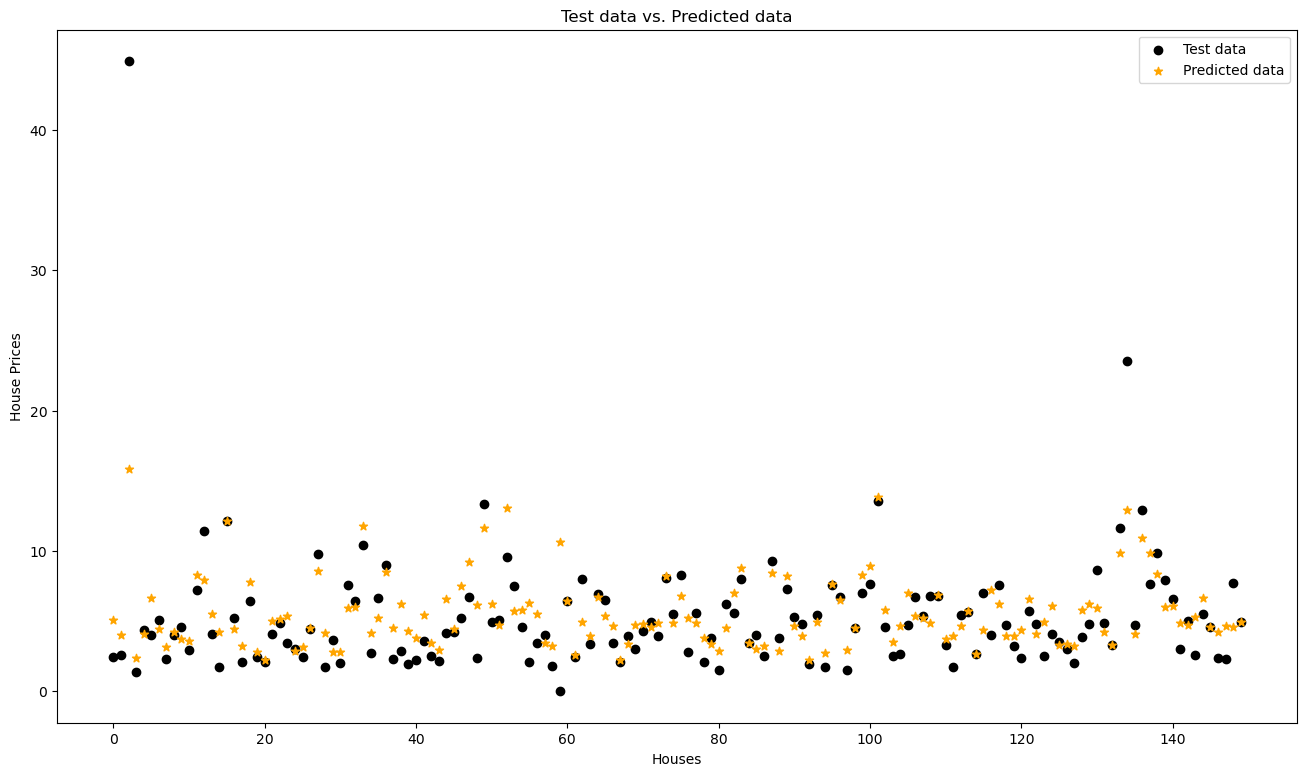

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(range(len(Y_test[:150])),Y_test[:150], color='black', label='Test data')
plt.scatter(range(len(Y_test_pred[:150])),Y_test_pred[:150], color='orange', marker='*', label='Predicted data')
plt.xlabel('Houses')
plt.ylabel('House Prices')
plt.title('Test data vs. Predicted data')
plt.legend()
plt.show()

In [16]:
check_Y = Y_test
type(check_Y)
check_Y['Predicted Price'] = Y_test_pred
print(check_Y.head(50))

          price  Predicted Price
3749   2.450000         5.049464
3367   2.600000         4.010483
2761  44.890000        15.840537
3528   1.400000         2.397937
3169   4.380000         4.067268
3580   3.999500         6.624540
670    5.110000         4.418679
4090   2.289500         3.177490
3150   4.035000         4.237349
2583   4.600000         3.714680
3938   2.959500         3.549162
4172   7.205000         8.291825
3924  11.400000         7.922103
3837   4.110000         5.494854
1908   1.700000         4.218181
970   12.125000        12.117353
94     5.240000         4.466458
117    2.060000         3.216038
834    6.450000         7.794581
1835   2.405000         2.818709
3553   2.099500         2.211467
4582   4.060625         5.007371
3001   4.888000         5.147791
3236   3.435000         5.335652
966    3.000000         2.888305
3278   2.450000         3.180702
1767   4.400000         4.474187
985    9.780000         8.595590
2506   1.710000         4.118458
517    3.6

In [17]:
Y_new_pred = regr.predict([[1200,3,0,0,0,0,0,0,0,0,0,0]])
Y_new_pred

array([[420.02497279]])

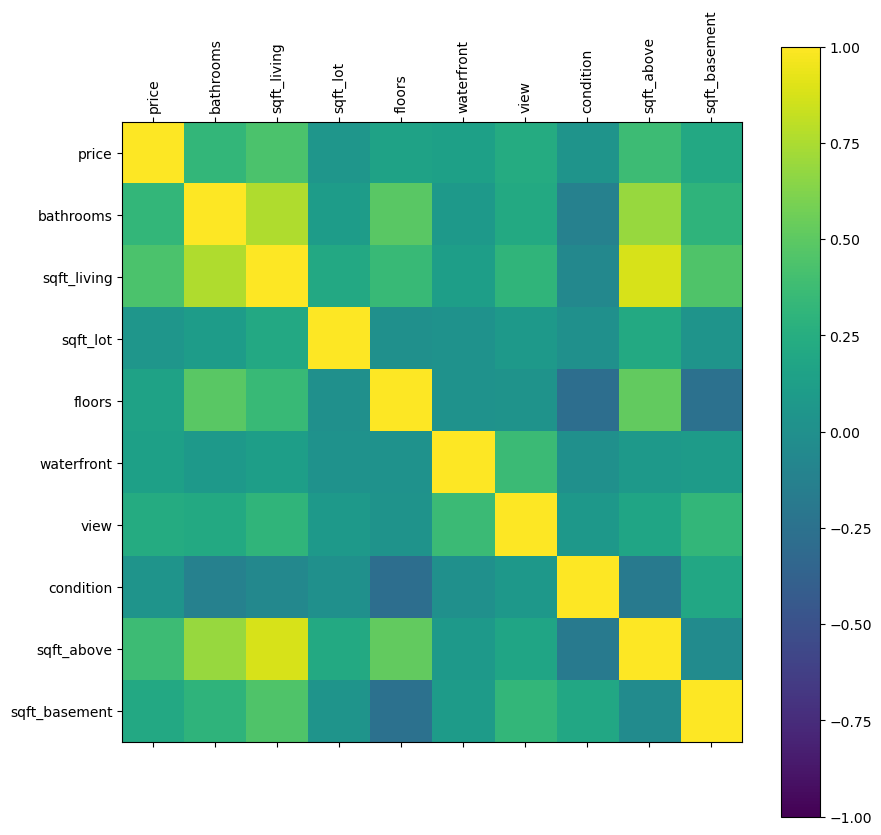

In [18]:
features = ['price','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']
df = data[features]
correlations = df.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,  len(features), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features, rotation = 90)
ax.set_yticklabels(features)
plt.show()

In [19]:
data.isnull().sum()

date             0
price            0
noOfBedrooms     0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [20]:
data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
data['view'] = pd.Categorical(data['view'], ordered=True)
data['condition'] = pd.Categorical(data['condition'], ordered=True)


In [21]:
data.dtypes

date               object
price             float64
noOfBedrooms        int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
street             object
city               object
statezip           object
country            object
dtype: object

In [22]:
data = data[data['noOfBedrooms'] < 10]

In [23]:
data = data[data['noOfBedrooms'] < 8]

In [24]:
data.head()

,date,price,noOfBedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
x_train,x_test,Y_train,Y_test=train_test_split(df,Y,train_size=0.8,random_state=42)

In [26]:
regr = linear_model.LinearRegression()
regr.fit(x_train, Y_train)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[ 1.00000000e-05  1.18863585e-17 -4.13738256e-20 -4.63418616e-22
  -9.70819503e-17  2.68736030e-16 -1.02843643e-17 -5.99890842e-17
  -3.06777088e-20 -1.07142687e-20]]


In [27]:
predictions = regr.predict(x_test)
print("Mean Squared Error: %.5f" % metrics.mean_squared_error(Y_test, predictions))
print("Score : %.5f" % regr.score(x_test, Y_test))

Mean Squared Error: 0.00000
Score : 1.00000


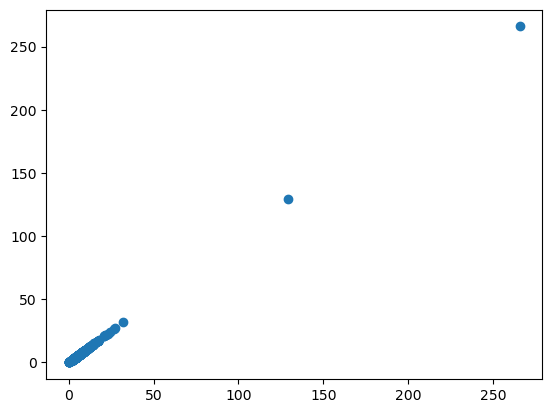

In [28]:
plt.scatter(Y_test, predictions)

In [29]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.557280539822594e-15
MSE: 2.584674649206952e-29
RMSE: 5.08396956049793e-15


In [30]:
print("R2 score: %.2f"%metrics.r2_score(Y_test, predictions))

R2 score: 1.00


In [31]:
import seaborn as sns

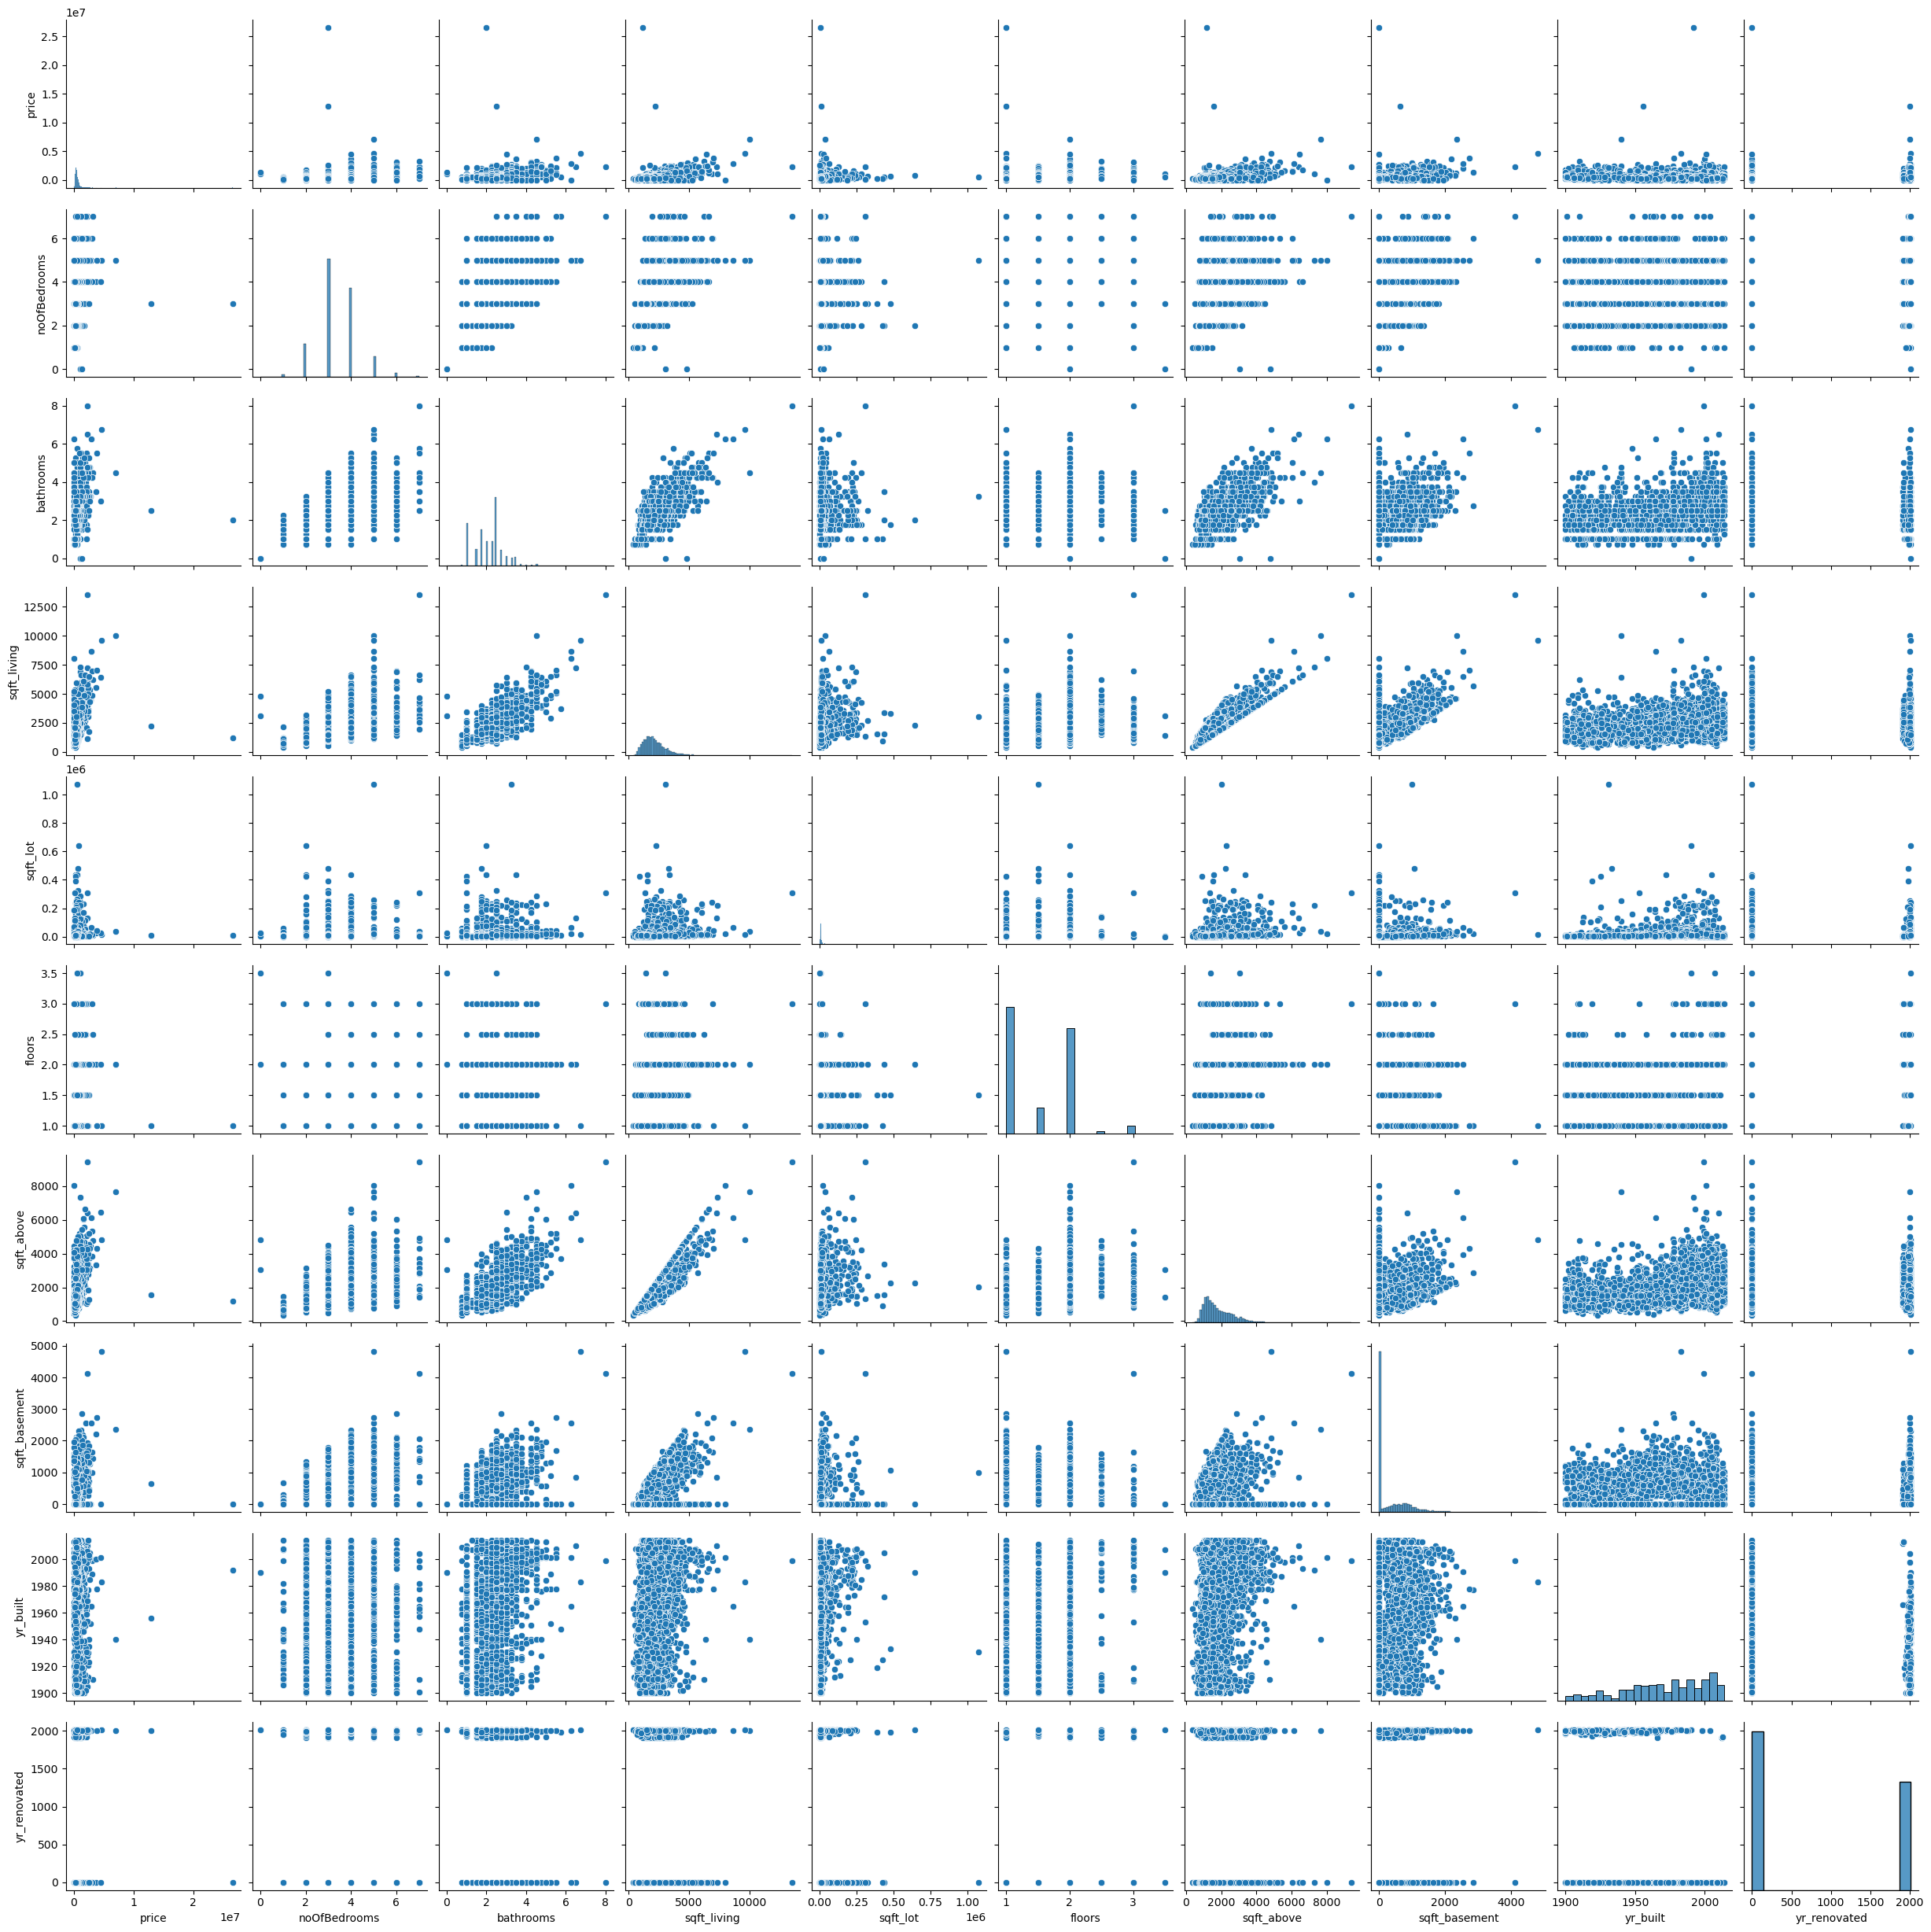

In [32]:
sns.pairplot(data)

<Axes: xlabel='sqft_living', ylabel='price'>

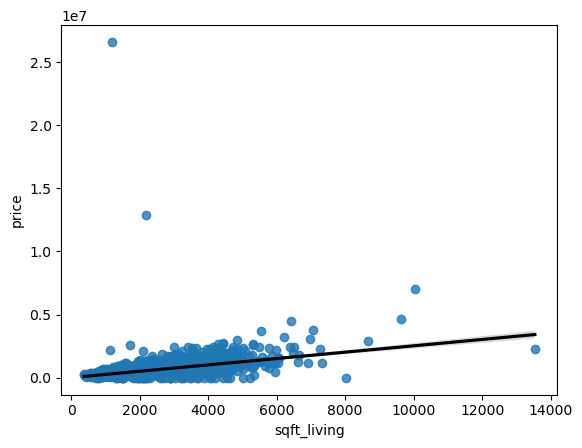

In [33]:
sns.regplot(x = 'sqft_living',y= 'price', data = data, line_kws={"color": "black"})

<Axes: xlabel='sqft_above', ylabel='price'>

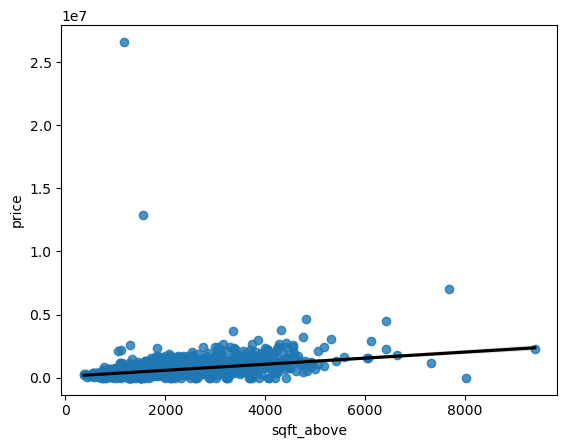

In [34]:
sns.regplot(x = 'sqft_above', y = 'price', data = data, line_kws={"color": "black"})

<Axes: xlabel='sqft_basement', ylabel='price'>

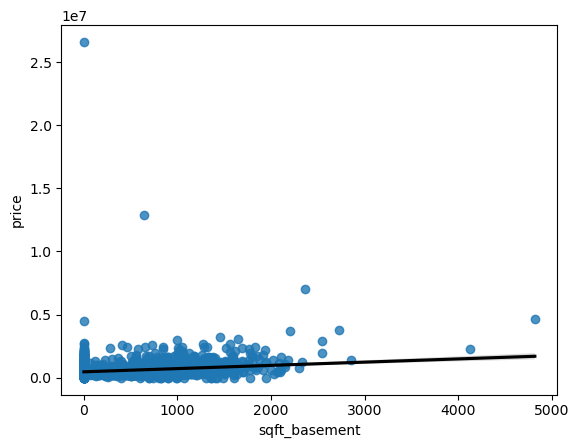

In [35]:
sns.regplot(x = 'sqft_basement', y = 'price', data = data, line_kws={"color": "black"})

<Axes: xlabel='condition', ylabel='price'>

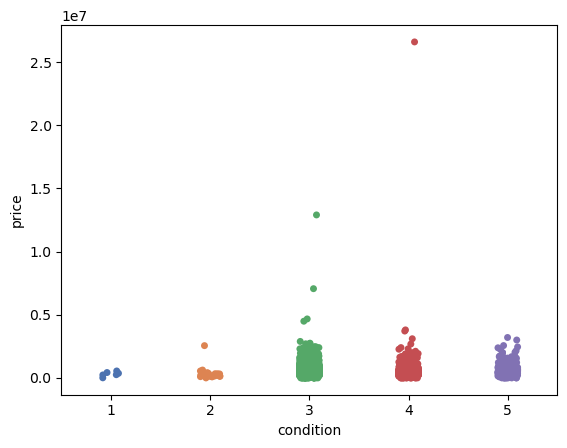

In [36]:
sns.stripplot(x = 'condition', y = 'price', data = data, palette = 'deep')

<Axes: xlabel='bathrooms', ylabel='price'>

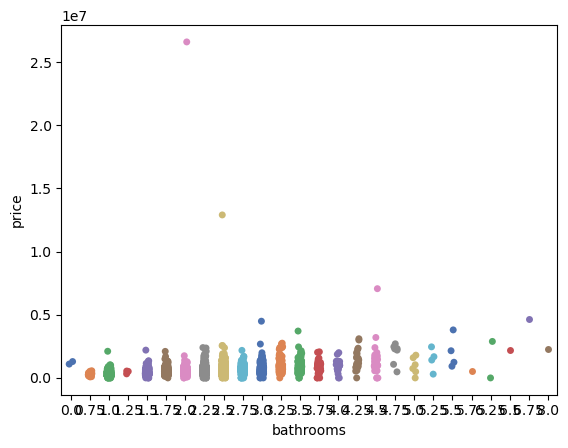

In [37]:
sns.stripplot(x = 'bathrooms', y = 'price', data = data, palette = 'deep')

<Axes: xlabel='sqft_living', ylabel='price'>

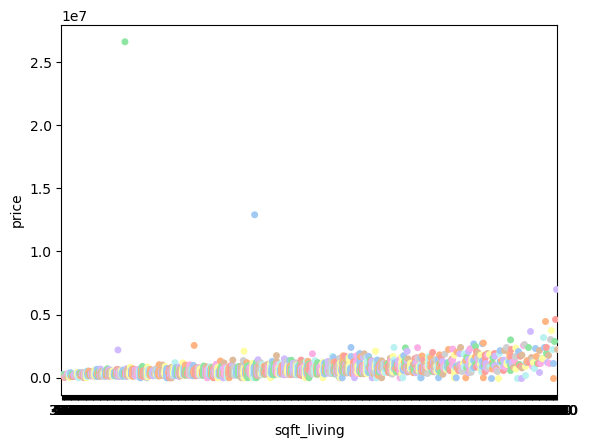

In [38]:
sns.stripplot(x = 'sqft_living', y = 'price', data = data, palette = 'pastel')

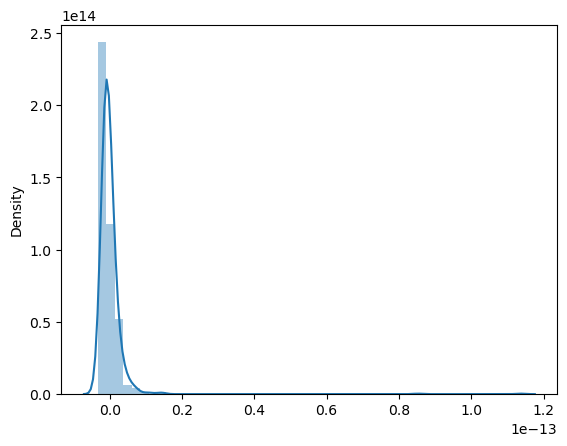

In [39]:
sns.distplot((Y_test-predictions),bins=50);